In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import ensemble
from sklearn import linear_model
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler  
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.decomposition import PCA

# Set up Test/Train for Clustering

In [8]:
## IMPORT latest dataset:

data = pd.read_csv('all_features5.csv',index_col = None)
data = data.drop('Unnamed: 0',axis = 1)
data.shape

(1516, 170)

In [9]:
data_clean = data.dropna(axis=0, how='any')
#data_clean = data

data_clean.shape

(1496, 170)

In [10]:
#X = data_clean.iloc[:,145:171]
X = data_clean

X = X.drop(['filenum','filename','classified_shape'] , axis = 1)

Y = data_clean['classified_shape']
X.shape

(1496, 167)

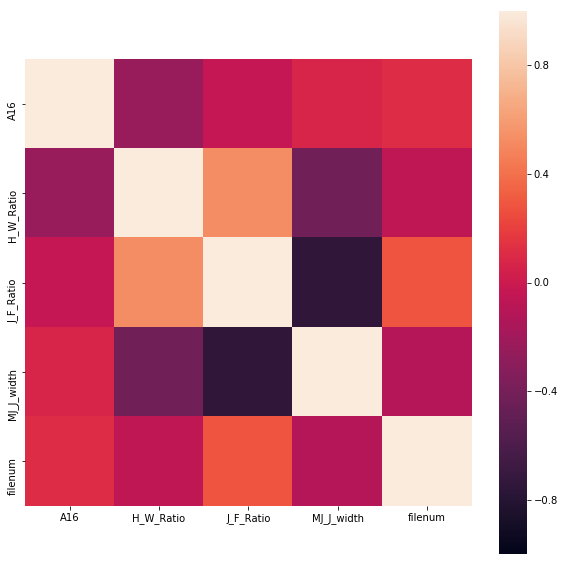

In [117]:
SMALL_X = data_clean.drop(['0','1','2','3','4','5','6','7','8','9','10','11',	'12',	'13',	'14',	'15',	'16','17',
                             '18',	'19',	'20',	'21',	'22',	'23',	'24','25',	'26',	'27',	'28',	'29',
                             '30',	'31',	'32',	'33',	'34',	'35',	'36',	'37',	'38',	'39',	'40',	'41',
                             '42',	'43',	'44',	'45',	'46',	'47',	'48',	'49',	'50',	'51',	'52',	'53',
                             '54',	'55',	'56',	'57',	'58',	'59',	'60',	'61',	'62',	'63',	'64',	'65',
                             '66',	'67',	'68',	'69',	'70',	'71',	'72',	'73',	'74',	'75',	'76',	'77',
                             '78',	'79',	'80',	'81',	'82',	'83',	'84',	'85',	'86',	'87',	'88',	'89',
                             '90',	'91',	'92',	'93',	'94',	'95',	'96',	'97',	'98',	'99',	'100',	'101',
                             '102',	'103',	'104',	'105',	'106',	'107',	'108',	'109',	'110',	'111',	'112',	'113',
                             '114',	'115',	'116',	'117',	'118',	'119',	'120',	'121',	'122',	'123',	'124',	'125',
                             '126',	'127',	'128',	'129',	'130',	'131',	'132',	'133',	'134',	'135',	'136',	'137',
                             '138',	'139',	'140',	'141',	'142',	'143'
                             ,'A1','A2','A3','A4','A5','A6','A7','A8'
                             ,'A9','A10','A11','A12','A13','A14','A15'
                            ,'Height','Width'
                            ,'MJ_width','Jaw_width'
                            #'H_W_Ratio','J_F_Ratio','MJ_J_width'
                               ],axis = 1)
corrmat = SMALL_X.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(10, 10))

# Draw the heatmap using seaborn
sns.heatmap(corrmat,vmin= -1, vmax=1, square=True)
plt.show()

# Supervised Learning

In [40]:
# Standardize features by removing the mean and scaling to unit variance

scaler = StandardScaler()  
scaler.fit(X)  

X = scaler.transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(
    X,Y,
    test_size=0.25,
    random_state=None)


### Use PCA for dimension reduction

In [79]:
n_components = 18
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X)


print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    pca.explained_variance_ratio_
)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [ 0.21832318  0.17343492  0.14741539  0.09751322  0.06112373  0.04517907
  0.04070668  0.02987472  0.02391309  0.01901663  0.01704977  0.01518068
  0.01206449  0.01071227  0.0078815   0.00646974  0.00561042  0.00545553]


In [80]:
# #Remove PCA 

X_train_pca = X_train
X_test_pca = X_test

## Neural Network (MLP)

In [81]:
mlp = MLPClassifier(hidden_layer_sizes=(60,10,60,30), solver='sgd',shuffle  = True, 
                    learning_rate_init=0.01, max_iter = 1000,warm_start  = False)
#reducing the learning rate init allowed the MLP to converge 
mlp.fit(X_train_pca, Y_train)
mlp.score(X_train_pca, Y_train)

0.99821746880570406

In [82]:
print(mlp.score(X_train_pca,Y_train))
mlp_score = mlp.score(X_test_pca,Y_test)
print(mlp_score)

y_pred = mlp.predict(X_test_pca)
 
mlp_crosstab = pd.crosstab(Y_test, y_pred, margins=True)
mlp_crosstab

0.998217468806
0.622994652406


col_0,heart,long,oval,round,square,All
classified_shape,,,,,,
heart,32,3,12,4,7,58
long,4,39,11,4,13,71
oval,11,10,44,4,14,83
round,4,0,5,63,11,83
square,4,10,7,3,55,79
All,55,62,79,78,100,374


In [83]:
from sklearn.model_selection import cross_val_score
cross_val_score(mlp, X, Y, cv=5)

array([ 0.31125828,  0.43143813,  0.3812709 ,  0.33557047,  0.36241611])

In [84]:
print(classification_report(Y_test,y_pred))


             precision    recall  f1-score   support

      heart       0.58      0.55      0.57        58
       long       0.63      0.55      0.59        71
       oval       0.56      0.53      0.54        83
      round       0.81      0.76      0.78        83
     square       0.55      0.70      0.61        79

avg / total       0.63      0.62      0.62       374



In [85]:
# Get the RECALL for each shape and overall
correct_list =[]
shape_list = []
for i in mlp_crosstab.index[0:5]:
    correct = (mlp_crosstab.at[i,i]/mlp_crosstab.at[i,'All'])
    correct = round(correct,2)* 100
    shape_list.append(i)
    correct_list.append(correct)

shape_list.append('Overall')
correct_list.append(round(mlp_score,2)*100)
results_df = pd.DataFrame()
results_df['shape']= shape_list
results_df['MLP']=correct_list


## KNN Classifier

In [86]:
#neigh = KNeighborsClassifier(n_neighbors=9,weights='distance')

#determined 9 was best through experimentation, wighting by distance led to overfitting

neigh = KNeighborsClassifier(n_neighbors=9) 
neigh.fit(X_train_pca, Y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [87]:
print(neigh.score(X_train_pca,Y_train))
print(neigh.score(X_test_pca,Y_test))
y_pred = neigh.predict(X_test_pca)

KNN_crosstab = pd.crosstab(Y_test, y_pred,margins = True) 
KNN_crosstab

0.712121212121
0.561497326203


col_0,heart,long,oval,round,square,All
classified_shape,,,,,,
heart,31,7,9,8,3,58
long,10,36,16,2,7,71
oval,20,7,43,6,7,83
round,7,1,4,65,6,83
square,11,9,18,6,35,79
All,79,60,90,87,58,374


In [88]:
print(cross_val_score(neigh, X, Y, cv=5))
print(classification_report(Y_test,y_pred))

[ 0.24503311  0.37458194  0.3812709   0.30872483  0.30201342]
             precision    recall  f1-score   support

      heart       0.39      0.53      0.45        58
       long       0.60      0.51      0.55        71
       oval       0.48      0.52      0.50        83
      round       0.75      0.78      0.76        83
     square       0.60      0.44      0.51        79

avg / total       0.57      0.56      0.56       374



In [89]:
correct_list =[]
for i in KNN_crosstab.index[0:5]:
    correct = (KNN_crosstab.at[i,i]/KNN_crosstab.at[i,'All'])
    correct = round(correct,2)* 100
    correct_list.append(correct)

correct_list.append(round(neigh.score(X_test_pca,Y_test),2)*100)
results_df['KNN']=correct_list

### Random Forest Classifier

In [90]:

clf = RandomForestClassifier(max_depth=18, random_state=0,n_estimators=20)
clf.fit(X_train_pca, Y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=18, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [91]:
print(clf.score(X_train_pca,Y_train))
print(clf.score(X_test_pca,Y_test))
y_pred = clf.predict(X_test_pca)

rfc_crosstab = pd.crosstab(Y_test, y_pred,margins = True) 
rfc_crosstab

0.999108734403
0.585561497326


col_0,heart,long,oval,round,square,All
classified_shape,,,,,,
heart,29,5,10,9,5,58
long,5,37,15,2,12,71
oval,11,4,54,5,9,83
round,9,1,1,60,12,83
square,8,9,15,8,39,79
All,62,56,95,84,77,374


In [92]:
print(cross_val_score(clf, X, Y, cv=5))
print(classification_report(Y_test,y_pred))

[ 0.32781457  0.41137124  0.27759197  0.33221477  0.41275168]
             precision    recall  f1-score   support

      heart       0.47      0.50      0.48        58
       long       0.66      0.52      0.58        71
       oval       0.57      0.65      0.61        83
      round       0.71      0.72      0.72        83
     square       0.51      0.49      0.50        79

avg / total       0.59      0.59      0.59       374



In [93]:
correct_list =[]
for i in rfc_crosstab.index[0:5]:
    correct = (rfc_crosstab.at[i,i]/rfc_crosstab.at[i,'All'])
    correct = round(correct,2)* 100
    correct_list.append(correct)

correct_list.append(round(clf.score(X_test_pca,Y_test),2)*100)
results_df['Random_Forest']=correct_list


### Gradient Boosting

In [94]:
# GB is by far the slowest model to run

In [95]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
gb = ensemble.GradientBoostingClassifier(**params)
gb.fit(X_train_pca, Y_train)

predict_train = gb.predict(X_train_pca)
predict_test = gb.predict(X_test_pca)

In [96]:
# Accuracy tables.
table_train = pd.crosstab(Y_train, predict_train, margins=True)
table_test = pd.crosstab(Y_test, predict_test, margins=True)

print(gb.score(X_train_pca,Y_train))
print(gb.score(X_test_pca,Y_test))
table_test

1.0
0.596256684492


col_0,heart,long,oval,round,square,All
classified_shape,,,,,,
heart,28,4,12,6,8,58
long,6,37,14,2,12,71
oval,12,5,46,4,16,83
round,8,2,5,58,10,83
square,4,7,11,3,54,79
All,58,55,88,73,100,374


In [97]:
print(cross_val_score(gb, X, Y, cv=5))
print(classification_report(Y_test,predict_test))

[ 0.34768212  0.45819398  0.3812709   0.38255034  0.40268456]
             precision    recall  f1-score   support

      heart       0.48      0.48      0.48        58
       long       0.67      0.52      0.59        71
       oval       0.52      0.55      0.54        83
      round       0.79      0.70      0.74        83
     square       0.54      0.68      0.60        79

avg / total       0.61      0.60      0.60       374



In [98]:
correct_list =[]
for i in table_test.index[0:5]:
    correct = (table_test.at[i,i]/table_test.at[i,'All'])
    correct = round(correct,2)* 100
    correct_list.append(correct)

correct_list.append(round(gb.score(X_test_pca,Y_test),2)*100)
results_df['Gradient_Boosting']=correct_list

## Linear Discriminant Analysis

In [99]:

lda = LinearDiscriminantAnalysis(n_components = 10)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_pca, Y_train)


C:\Users\boyerm\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [100]:
#print(lda.score(X_train_pca, Y_train))
#print(lda.score(X_test_pca, Y_test))

predict_test = lda.predict(X_test_pca)
table_test = pd.crosstab(Y_test, predict_test, margins=True)
table_test

0.757575757576
0.585561497326


col_0,heart,long,oval,round,square,All
classified_shape,,,,,,
heart,32,1,14,4,7,58
long,4,32,16,5,14,71
oval,9,9,46,6,13,83
round,9,2,4,60,8,83
square,5,12,9,4,49,79
All,59,56,89,79,91,374


In [118]:
print(cross_val_score(lda, X, Y, cv=5))
print(classification_report(Y_test,predict_test))

[ 0.37417219  0.4180602   0.39464883  0.32214765  0.36241611]
             precision    recall  f1-score   support

      heart       0.54      0.55      0.55        58
       long       0.57      0.45      0.50        71
       oval       0.52      0.55      0.53        83
      round       0.76      0.72      0.74        83
     square       0.54      0.62      0.58        79

avg / total       0.59      0.59      0.59       374



C:\Users\boyerm\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\boyerm\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\boyerm\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\boyerm\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\boyerm\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [102]:
correct_list =[]
for i in table_test.index[0:5]:
    correct = (table_test.at[i,i]/table_test.at[i,'All'])
    correct = round(correct,2)* 100
    correct_list.append(correct)

correct_list.append(round(lda.score(X_test_pca,Y_test),2)*100)
results_df['LDA']=correct_list
results_df

,shape,MLP,KNN,Random_Forest,Gradient_Boosting,LDA
0,heart,55.0,53.0,50.0,48.0,55.0
1,long,55.0,51.0,52.0,52.0,45.0
2,oval,53.0,52.0,65.0,55.0,55.0
3,round,76.0,78.0,72.0,70.0,72.0
4,square,70.0,44.0,49.0,68.0,62.0
5,Overall,62.0,56.0,59.0,60.0,59.0


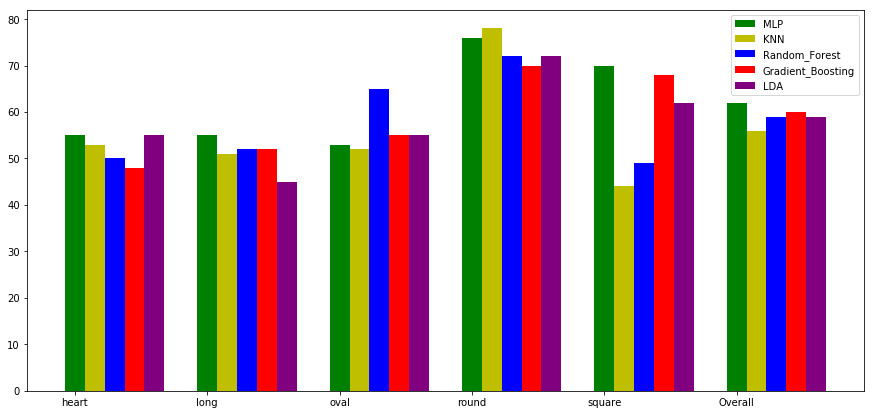

In [103]:
import matplotlib.pyplot as plt

def model_graph():
    ind = np.arange(6)  # the x locations for the groups
    width = 0.15       # the width of the bars

    fig, ax = plt.subplots(figsize=(15, 7))
    rects1 = ax.bar(ind, results_df['MLP'], width, color='g',tick_label = results_df['shape'])
    rects2 = ax.bar(ind + width, results_df['KNN'], width, color='y')
    rects3 = ax.bar(ind + width*2, results_df['Random_Forest'], width, color='b')
    rects4 = ax.bar(ind + width*3, results_df['Gradient_Boosting'], width, color='r')
    rects5 = ax.bar(ind + width*4, results_df['LDA'], width, color='purple')

    ax.legend(results_df.iloc[0:0,1:7],loc=0)
    plt.show()
    
model_graph()

The neural network outperformed the other models for overall performance and for four out of the five shapes.

In [104]:
results_df

,shape,MLP,KNN,Random_Forest,Gradient_Boosting,LDA
0,heart,55.0,53.0,50.0,48.0,55.0
1,long,55.0,51.0,52.0,52.0,45.0
2,oval,53.0,52.0,65.0,55.0,55.0
3,round,76.0,78.0,72.0,70.0,72.0
4,square,70.0,44.0,49.0,68.0,62.0
5,Overall,62.0,56.0,59.0,60.0,59.0
